## 1. 국가(대륙)별/상품군별 온라인 쇼핑몰

### 1.1 K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?

## 2. 필요 라이브러리 가져오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
%matplotlib inline

In [2]:
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

## 3. 데이터 로드하기

In [5]:
df_raw = pd.read_csv('국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20200822145551.csv',encoding='cp949')
print(df_raw.shape)
df_raw.head(5)

(450, 27)


,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,...,749612,858240,833672,897205,921586,974060,1250236,1344404,1525396,1879499
1,합계,합계,면세점,-,-,-,-,-,-,-,...,610630,677884,665613,725319,761836,770656,1070693,1157158,1336372,1655635
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,...,138982,180356,168059,171886,159750,203404,179543,187246,189024,223864
3,합계,컴퓨터 및 주변기기,계,4915,4052,3912,3529,2903,2697,3804,...,2018,2158,5236,3854,4320,4511,3702,4038,3670,3826
4,합계,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,5,1,2,6,1,215,2,0,1,70


In [13]:
df_raw['국가(대륙)별'].value_counts()

미국            45
일본            45
아세안(ASEAN)    45
대양주           45
중국            45
중동            45
EU            45
합계            45
기타            45
중남미           45
Name: 국가(대륙)별, dtype: int64

In [12]:
df_raw['상품군별'].unique()  # -> 어느 데이터가 성장하고 있는 지 살펴봐야 함

array(['합계', '컴퓨터 및 주변기기', '가전·전자·통신기기', '소프트웨어', '서 적', '사무·문구',
       '음반·비디오·악기', '의류 및 패션관련 상품', '스포츠·레저용품', '화장품', '아동·유아용품', '음·식료품',
       '농축수산물', '생활용품 및 자동차용품', '기 타'], dtype=object)

## 4. 분석과 시각화를 위한 tidy data하기

In [20]:
df = df_raw.melt(id_vars=["국가(대륙)별","상품군별","판매유형별"],var_name="기간",value_name="백만원")
# id_vars : 사용하지 않은 것들 , value_vars, var_name, value_name
df.shape

(10800, 5)

In [21]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


In [22]:
df.info() # -> null 값이 없다, 전부 문자열인 데이터 이다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10800 non-null  object
 1   상품군별     10800 non-null  object
 2   판매유형별    10800 non-null  object
 3   기간       10800 non-null  object
 4   백만원      10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


## 5. 데이터 전처리

In [32]:
df['연도'] = df['기간'].map(lambda x:int(x.split()[0]))
df['분기'] = df['기간'].map(lambda x: int(x.split()[1].split('/')[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


In [35]:
# 금액을 수치데이터로 표현하기 위해 데이터 타입 변경
df['백만원'] = df['백만원'].replace('-',np.nan).astype(float)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1


In [37]:
df = df[(df['국가(대륙)별']!='합계')&(df['상품군별']!='합계')].copy()
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1


In [39]:
df.shape

(9072, 7)

## 6. K-Beauty 시각화

### 6.1 전체 상품군 판매액

In [40]:
# 판매유형별을 전체군으로 하여 시각화
df_total = df[df['판매유형별']=='계'].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


In [41]:
df_total.shape

(3024, 7)

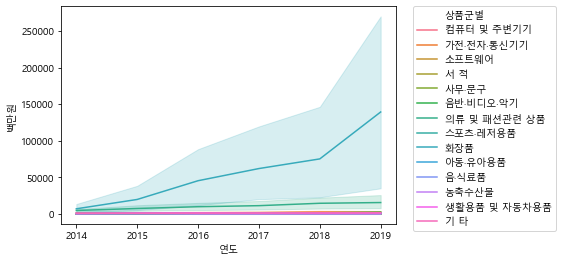

In [45]:
sns.lineplot(data=df_total, x='연도',y='백만원',hue='상품군별')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

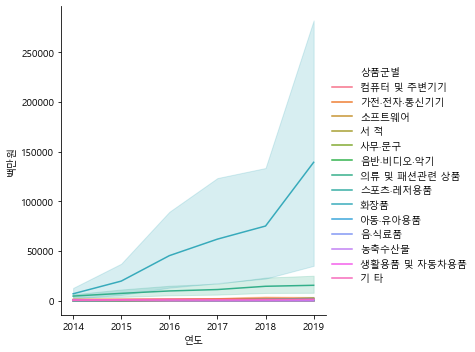

In [46]:
sns.relplot(data=df_total,x='연도',y='백만원',hue='상품군별',kind='line')

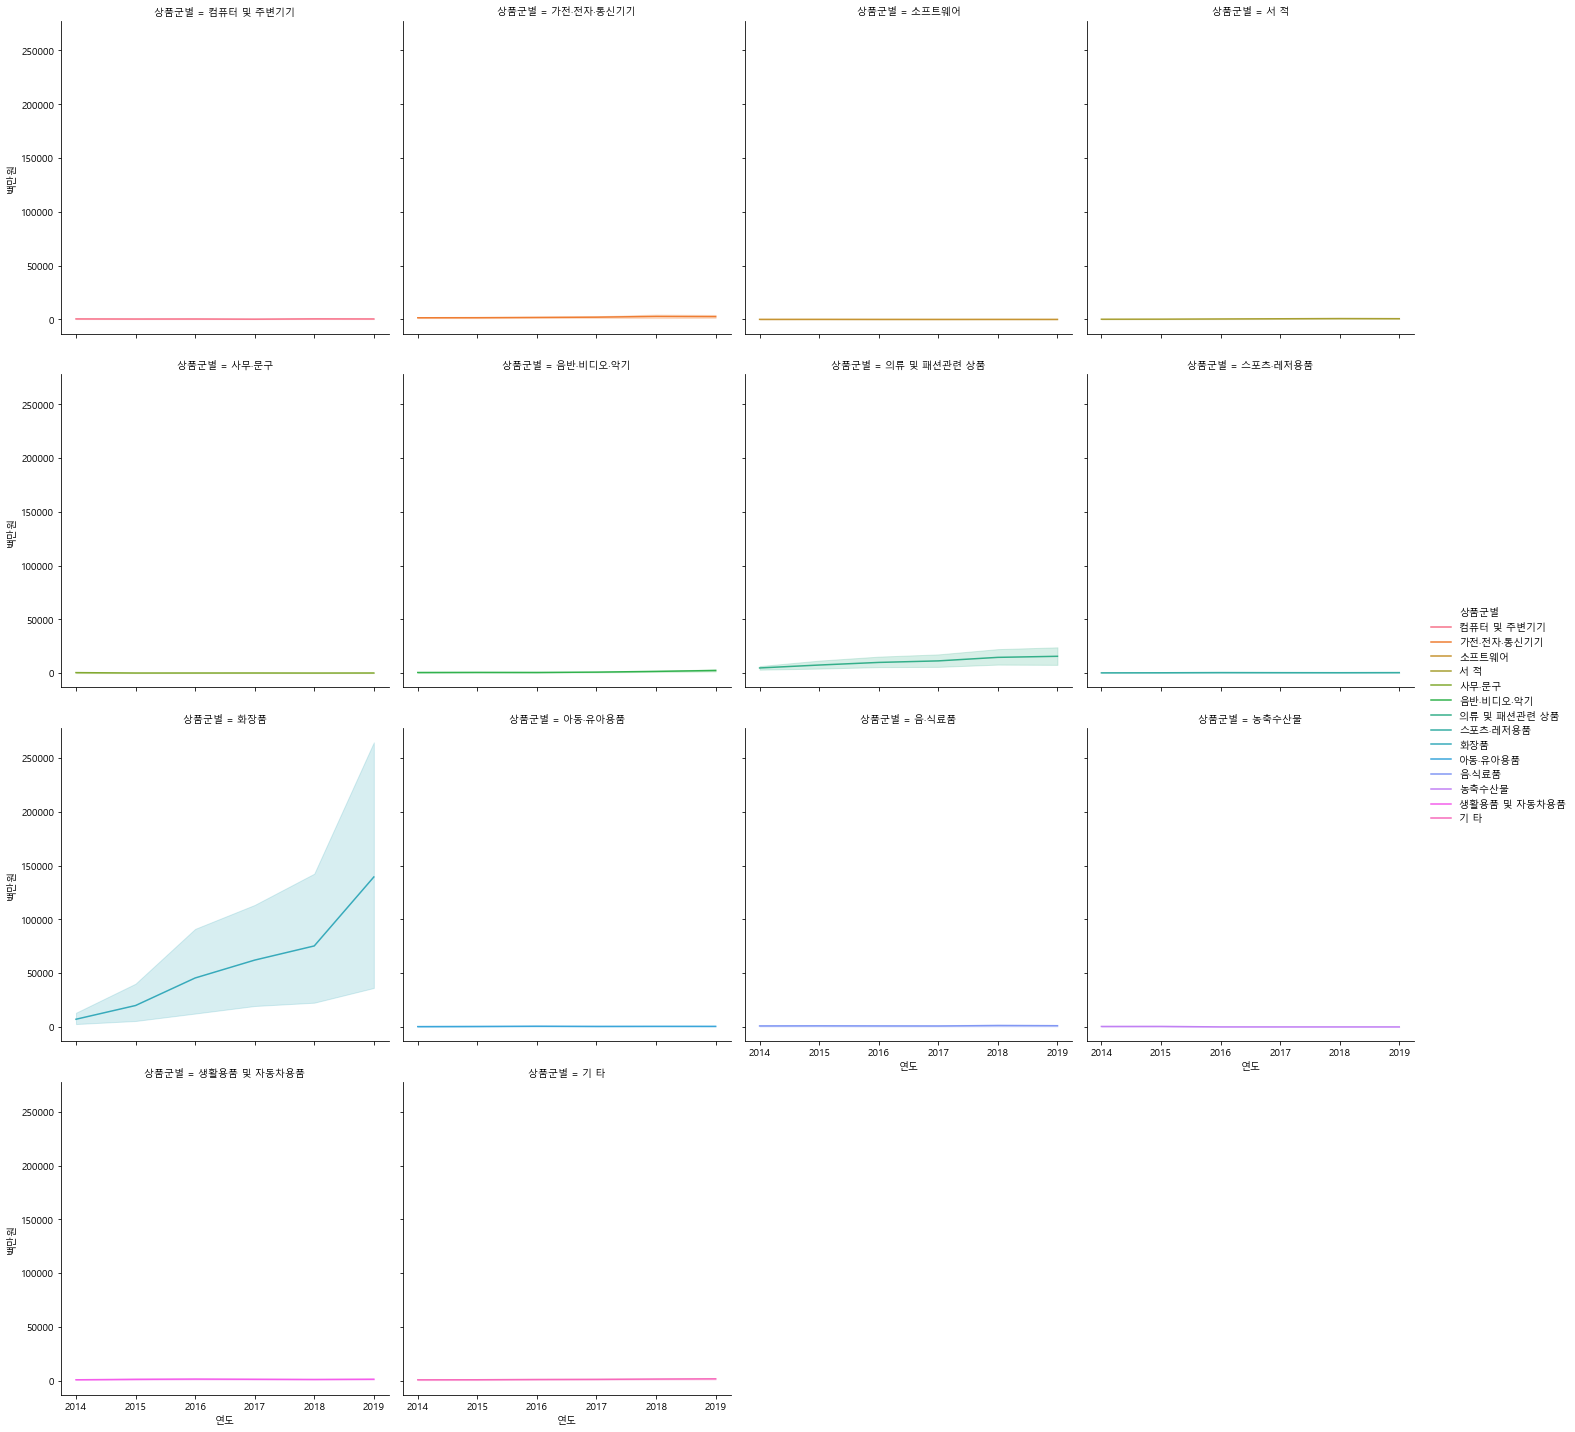

In [48]:
sns.relplot(data=df_total, x='연도',y='백만원',hue='상품군별',kind='line',col='상품군별',col_wrap=4)
# 해마다 증가한 상품은 [ 의류 및 패션관련 상품], [화장품]

In [51]:
df_sub = df_total[~df_total['상품군별'].isin(['화장품'])].copy()
df_sub.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


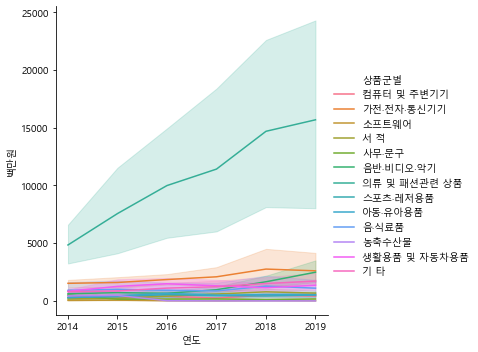

In [52]:
sns.relplot(data=df_sub,x='연도',y='백만원',hue='상품군별',kind='line')

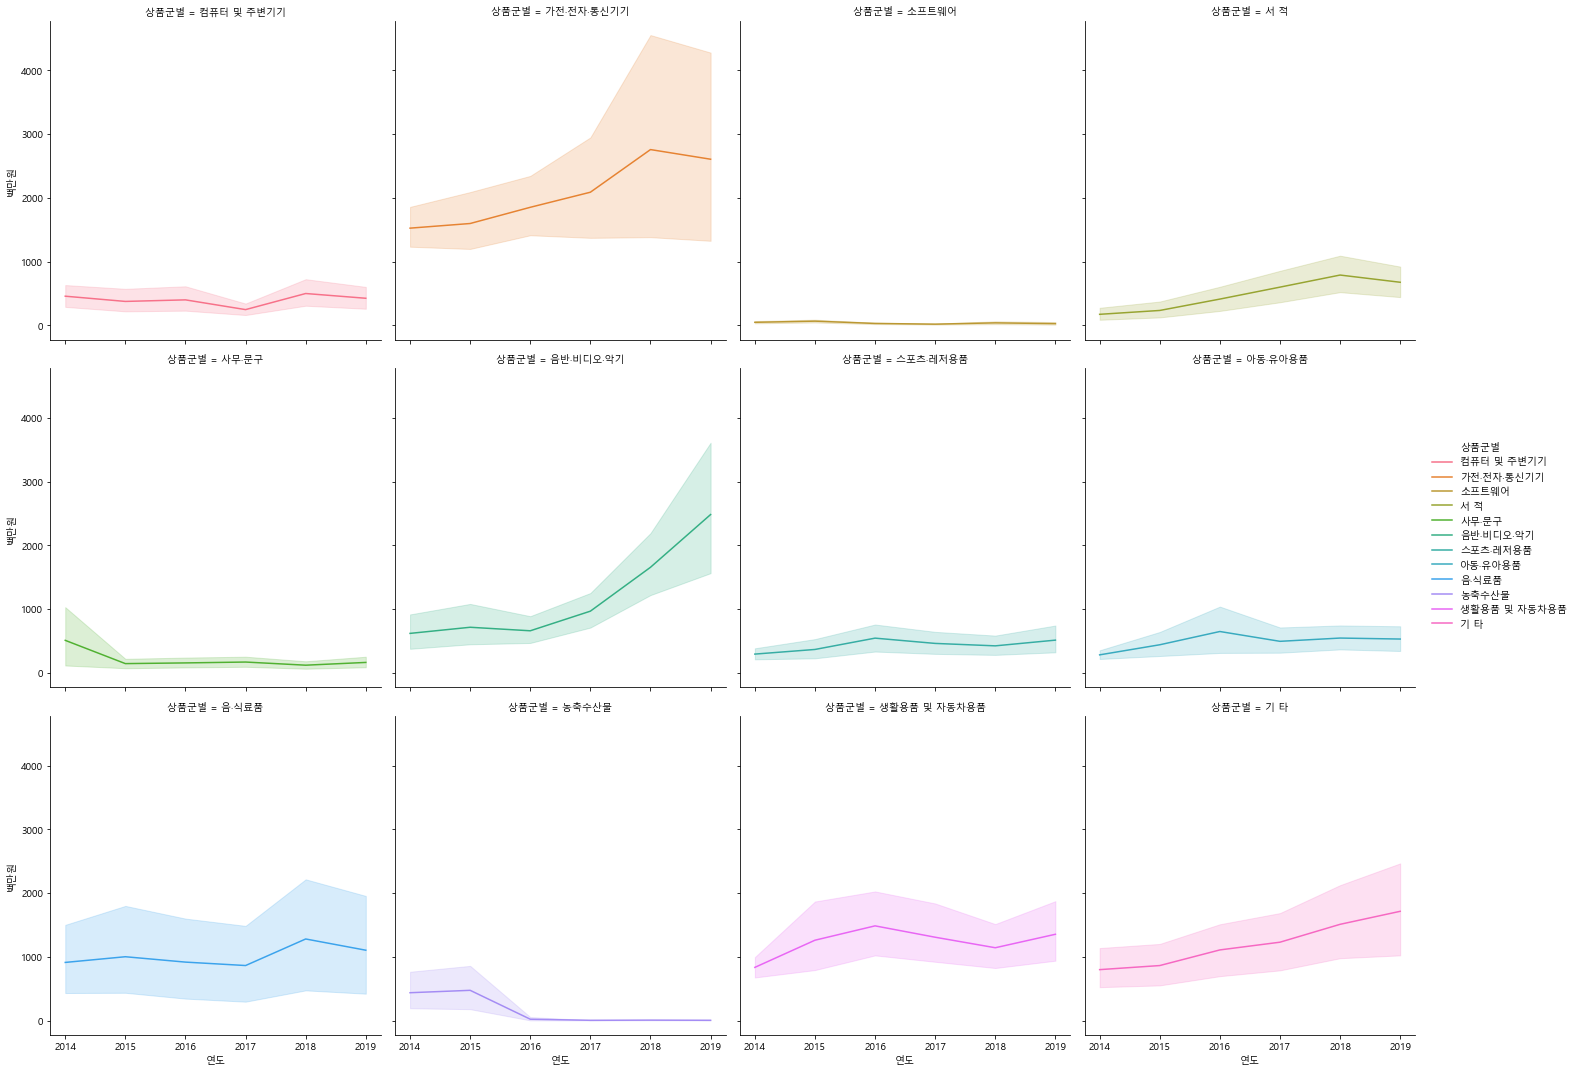

In [53]:
df_sub = df_total[~df_total['상품군별'].isin(['화장품','의류 및 패션관련 상품'])].copy()
sns.relplot(data=df_sub,x='연도',y='백만원',hue='상품군별',kind='line',col='상품군별',col_wrap=4)

### 6.2 화장품의 온라인쇼핑 해외직접판매액

In [58]:
df_cosmetic = df_total[df_total['상품군별'].isin(['화장품'])].copy()
df_cosmetic

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
72,미국,화장품,계,2014 1/4,3740.0,2014,1
117,중국,화장품,계,2014 1/4,32235.0,2014,1
162,일본,화장품,계,2014 1/4,1034.0,2014,1
207,아세안(ASEAN),화장품,계,2014 1/4,398.0,2014,1
252,EU,화장품,계,2014 1/4,937.0,2014,1
...,...,...,...,...,...,...,...
10602,EU,화장품,계,2019 4/4,3912.0,2019,4
10647,중동,화장품,계,2019 4/4,1134.0,2019,4
10692,중남미,화장품,계,2019 4/4,638.0,2019,4
10737,대양주,화장품,계,2019 4/4,1094.0,2019,4


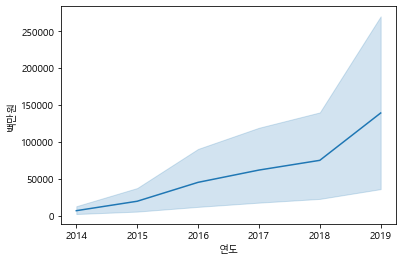

In [62]:
sns.lineplot(data=df_cosmetic,x='연도',y='백만원')

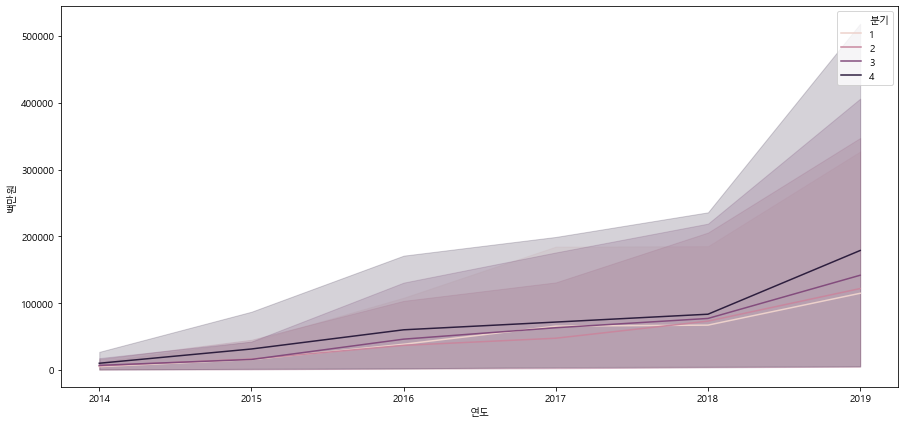

In [66]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df_cosmetic,x='연도',y='백만원',hue='분기')
# 4분기에 가장 성장했다

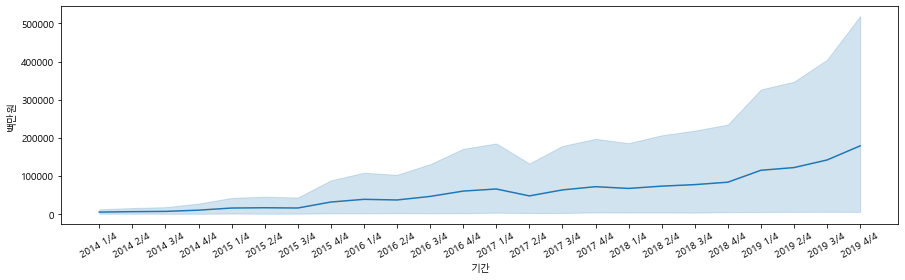

In [68]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic,x='기간',y='백만원')

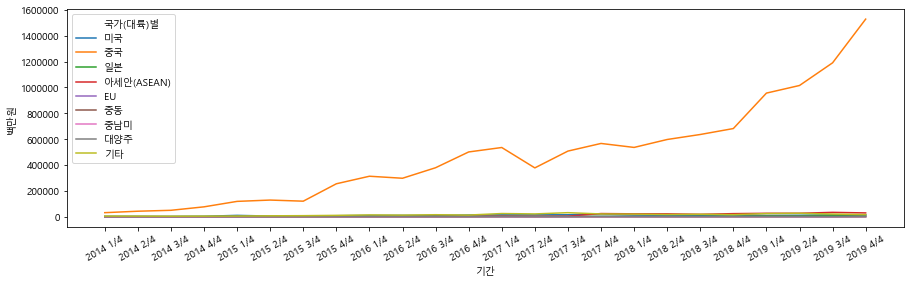

In [70]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y='백만원', hue="국가(대륙)별")
# 중국에서 가장 성장을 많이 했다

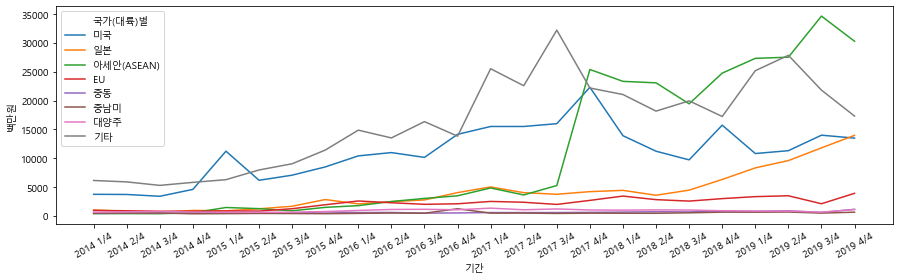

In [71]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[~df_cosmetic['국가(대륙)별'].isin(['중국'])], x="기간", y='백만원', hue="국가(대륙)별")
# 미국, 아세안 그리고 일본 순으로 가장 많이 판매되었다

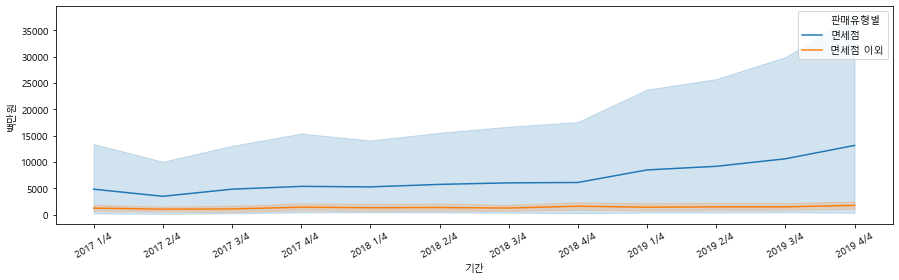

In [72]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
df_sub = df[df["판매유형별"] != "계"].copy()
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별")
# 면세점 사업도 크게 증가했다는 것을 알 수 있다

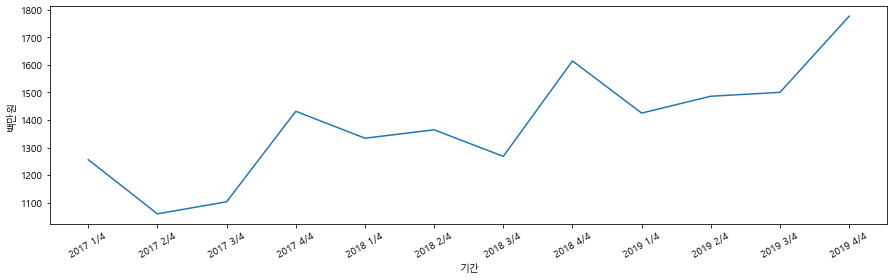

In [74]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
df_sub = df[~df['판매유형별'].isin(['계','면세점'])].copy()
sns.lineplot(data=df_sub,x='기간',y='백만원',ci=None)
# 면세점 이외에도 꾸준히 성장하는 모습을 볼 수 있다

### 6.3 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [76]:
df_fashion = df[(df['상품군별']=='의류 및 패션관련 상품')&(df['판매유형별']=='계')].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션관련 상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션관련 상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션관련 상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션관련 상품,계,2014 1/4,3473.0,2014,1
246,EU,의류 및 패션관련 상품,계,2014 1/4,1364.0,2014,1


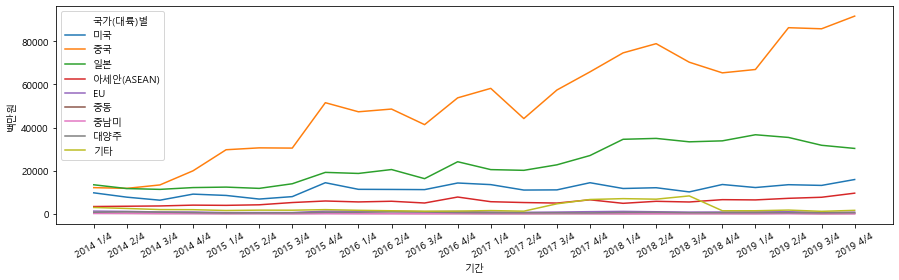

In [79]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x='기간',y='백만원',hue='국가(대륙)별')
# 증가한 나라 : 중가, 일본, 미국

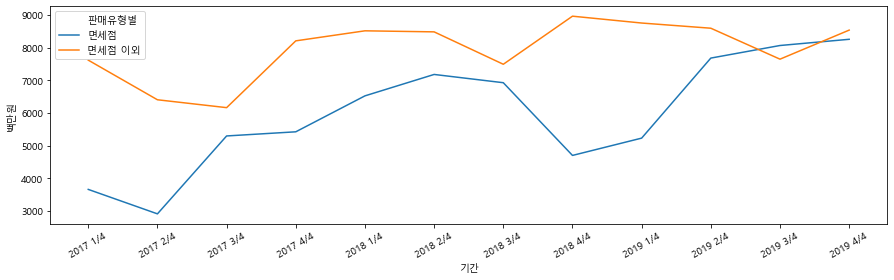

In [84]:
df_fashion2 = df[(df["상품군별"] == "의류 및 패션관련 상품") & (df["판매유형별"] != "계")].copy()
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2,x='기간',y='백만원',hue='판매유형별',ci=None)
# 면세점 이외에서 더 많이 팔렸다는 사실을 알 수 있었다 -> 다음 면세점

### 6.4 데이터 집계하기

In [92]:
result = df_fashion.pivot_table(index='국가(대륙)별',columns='연도',values='백만원',aggfunc='sum')
# 연도별로 나누는 방법 : columns
result

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
EU,4485.0,3374.0,4899.0,3736.0,4114.0,3694.0
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6309.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2387.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55035.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31217.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134243.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330254.0
중남미,975.0,616.0,649.0,762.0,576.0,543.0
중동,1172.0,1018.0,968.0,772.0,879.0,924.0


### 6.5 연산결과를 시각적으로 보기

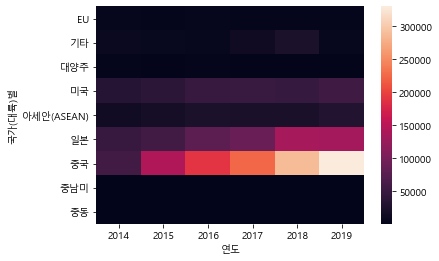

In [94]:
sns.heatmap(result)
## 중국이랑 일본이 눈에 띄게 증가했음을 알 수 있다

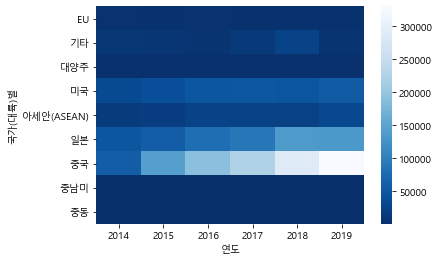

In [96]:
sns.heatmap(result,cmap='Blues_r')

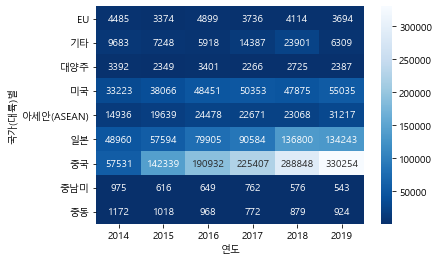

In [98]:
sns.heatmap(result,cmap='Blues_r',annot=True,fmt='.0f')

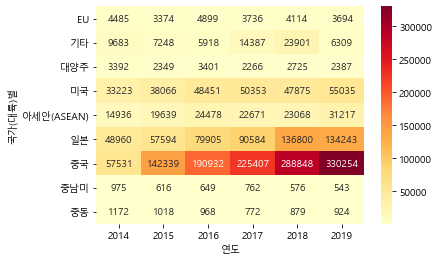

In [100]:
sns.heatmap(result, cmap='YlOrRd',fmt='.0f',annot=True)

## 6.6 전체 시각화

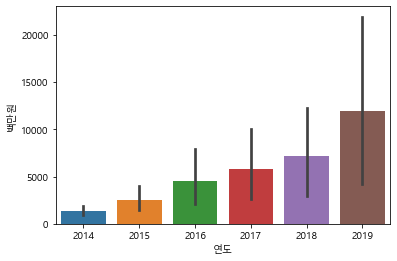

In [101]:
sns.barplot(data=df_total,x='연도',y='백만원')

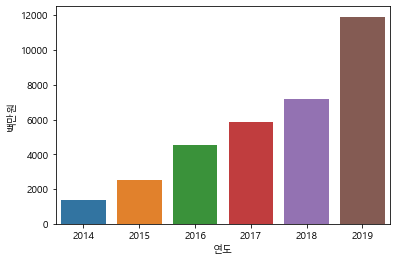

In [102]:
sns.barplot(data=df_total,x='연도',y='백만원',ci=None)

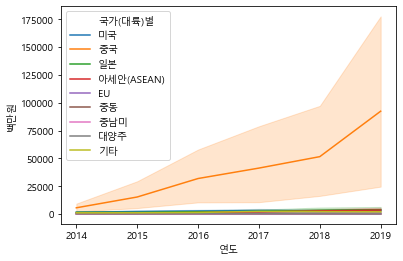

In [103]:
sns.lineplot(data=df_total,x='연도',y='백만원',hue='국가(대륙)별')